# Choose a Data Set

You can choose to analyze any data that you would like! Remember, you need 1000 rows of non-null data in order to get 5 points for the "Data" criteria of my [rubric](https://docs.google.com/document/d/1s3wllcF3LLnytxwD8mZ-BCypXKnfaahnizWGNojT-B4/edit?usp=sharing). Consider looking at [Kaggle](https://www.kaggle.com/datasets) or [free APIs](https://free-apis.github.io/#/browse) for datasets of this size. Alternatively, you can scrape the web to make your own dataset! :D

Once you have chosen your dataset, please read your data into a dataframe and call `.info()` below. If you don't call `info` I will give you 0 points for the first criteria described on the [rubric](https://docs.google.com/document/d/1s3wllcF3LLnytxwD8mZ-BCypXKnfaahnizWGNojT-B4/edit?usp=sharing).

In [2]:
import requests
import pandas as pd
import seaborn as sns
df = pd.read_csv('Netflix_Movies_and_TV_Shows.csv' ,encoding='windows-1252')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         3000 non-null   object
 1   Type          3000 non-null   object
 2   Genre         3000 non-null   object
 3   Release Year  3000 non-null   int64 
 4   Rating        3000 non-null   object
 5   Duration      3000 non-null   object
 6   Country       3000 non-null   object
dtypes: int64(1), object(6)
memory usage: 164.2+ KB


# My Question

### What the chance for a country produce a movie on netflix of a certain genre


# My Analysis

          Country        Genre  number of made
0       Australia       Action              32
1       Australia       Comedy              48
2       Australia  Documentary              40
3       Australia        Drama              58
4       Australia       Horror              39
..            ...          ...             ...
59  United States        Drama              52
60  United States       Horror              49
61  United States      Romance              43
62  United States       Sci-Fi              44
63  United States     Thriller              54

[64 rows x 3 columns]
Country
Australia         12.366667
Canada            14.033333
Germany           12.433333
India             11.633333
Japan             11.633333
South Korea       12.533333
United Kingdom    13.066667
United States     12.300000
Name: number of made, dtype: float64
Genre
Action         12.233333
Comedy         12.300000
Documentary    12.300000
Drama          12.600000
Horror         13.266667
Romance      

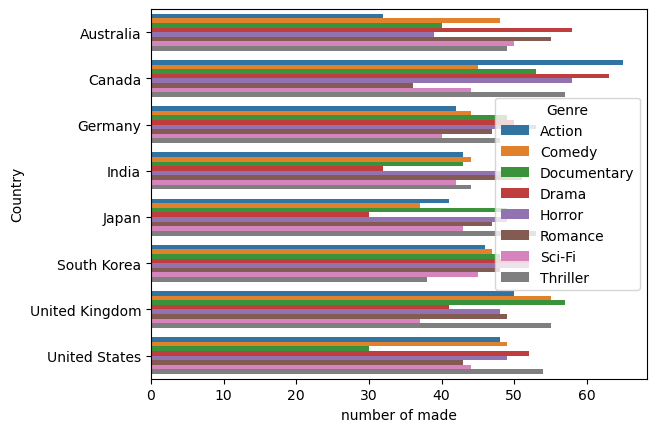

In [9]:
#Frequency Table

#Simple Theoretical Probability
funnylist = []
unique_countries = df['Country'].drop_duplicates()
#print(unique_countries)
unique_genre = df['Genre'].drop_duplicates()
#print(unique_genre)
#print(funnylist)
#tdf = pd.DataFrame(funnylist, columns=['Country', 'Genre', 'number of made'])
#mdp=tdf
#mdp
tdf = df.groupby(['Country', 'Genre']).size().reset_index(name='number of made')
print(tdf)
sns.barplot(data=tdf, x="number of made", y="Country", hue="Genre")
tdf['number of made'] = tdf['number of made'] / 30
print(tdf.groupby("Country")["number of made"].sum())#Frequency Table of each 
print(tdf.groupby("Genre")["number of made"].sum())
tdf = df.groupby(['Country', 'Genre']).size().reset_index(name='number of made')
country_total = tdf.groupby('Country')['number of made'].sum().reset_index(name='total movies')
tdf = pd.merge(tdf, country_total, on='Country')
tdf['theoretical probability'] = tdf['number of made'] / tdf['total movies']
print(tdf)


# My Answer

The chance is even for each type of movie per country. The amount of movies and genres is even with Canada leading the most amount of movies with 14% of movies made. Notably, India and Japan are on the bottom with 11%. This can be seen with the genre With all of them being around  12% with thriller and horror with 13%. This can be reinstated with the theoretical probability with Canada having the highest chance of having a movie made. This is also in the bar graph with the majority of all the movies having the the farlist on the graph. This can be concluded that if you were to pull a random netflix movie it whould probably be a canadian thriller or horror.